In [48]:
# import
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import warnings
import streamlit as st
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow import keras
from sklearn.cluster import KMeans
# folium
import folium
import folium.plugins as plugins
from streamlit_folium import folium_static

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'


# Style
sns.set_style(style = 'darkgrid')









font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)


# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_excel('sf_en_review25.xlsx')
df2 = pd.read_excel('scrape2.xlsx')
df3 = pd.read_excel('scrape3.xlsx')

df = pd.concat([df,df2, df3])
df.drop_duplicates(inplace = True)

In [3]:
df.isna().sum()

タイトル             19
タイトルリンク          19
typography-hy     0
point            32
w-100             0
口コミ投稿日            0
text-center       0
report            0
report1           0
dtype: int64

In [4]:
df.columns

Index(['タイトル', 'タイトルリンク', 'typography-hy', 'point', 'w-100', '口コミ投稿日',
       'text-center', 'report', 'report1'],
      dtype='object')

In [5]:
df.drop(['タイトルリンク', '口コミ投稿日', 'report', 'report1'], axis = 1, inplace = True)

In [6]:
df.shape

(225, 5)

In [7]:
df.columns

Index(['タイトル', 'typography-hy', 'point', 'w-100', 'text-center'], dtype='object')

In [8]:
df.rename(columns = {'タイトル': 'reviewer_info', 
                     'typography-hy': 'title', 
                     'point' : 'rating', 
                     'w-100': 'review', 
                     'text-center': 'year'}, inplace = True)

In [9]:
df.dtypes

reviewer_info     object
title             object
rating           float64
review            object
year              object
dtype: object

### Filling NaN values in ratting col with the mean of around 4.5

In [10]:
df['rating'].unique()
df['rating'].replace(np.nan, 4.5, inplace = True)

<AxesSubplot:>

2022-08-10 06:47:48.801 WARNING matplotlib.font_manager: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


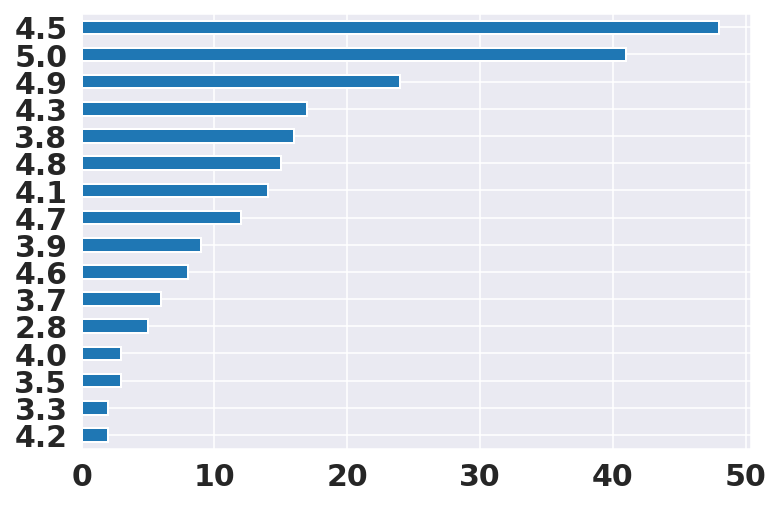

In [49]:
df['rating'].value_counts().sort_values().plot(kind = 'barh')

In [50]:
df['title'].unique()

array(['Work style (working hours/holidays/systems)',
       'Annual salary/salary', 'Corporate culture/organizational system',
       'Benefits/office environment',
       'Business prospects/strengths/weaknesses',
       'Gap before joining the company', 'working for women',
       'Growth/motivation'], dtype=object)

In [51]:
# df['column name'] = df['column name'].replace(['old value'],'new value')
df['title'] = df['title'].replace(['働き方（勤務時間・休日休暇・制度）'], 'Work style (working hours/holidays/systems)')
df['title'] = df['title'].replace(['年収・給与'], 'Annual salary/salary')
df['title'] = df['title'].replace(['企業カルチャー・組織体制'], 'Corporate culture/organizational system')
df['title'] = df['title'].replace(['福利厚生・オフィス環境'], 'Benefits/office environment')
df['title'] = df['title'].replace(['事業展望・強み・弱み'], 'Business prospects/strengths/weaknesses')
df['title'] = df['title'].replace(['入社前とのギャップ'], 'Gap before joining the company')
df['title'] = df['title'].replace(['女性の働きやすさ'], 'working for women')
df['title'] = df['title'].replace(['成長・働きがい'], 'Growth/motivation')

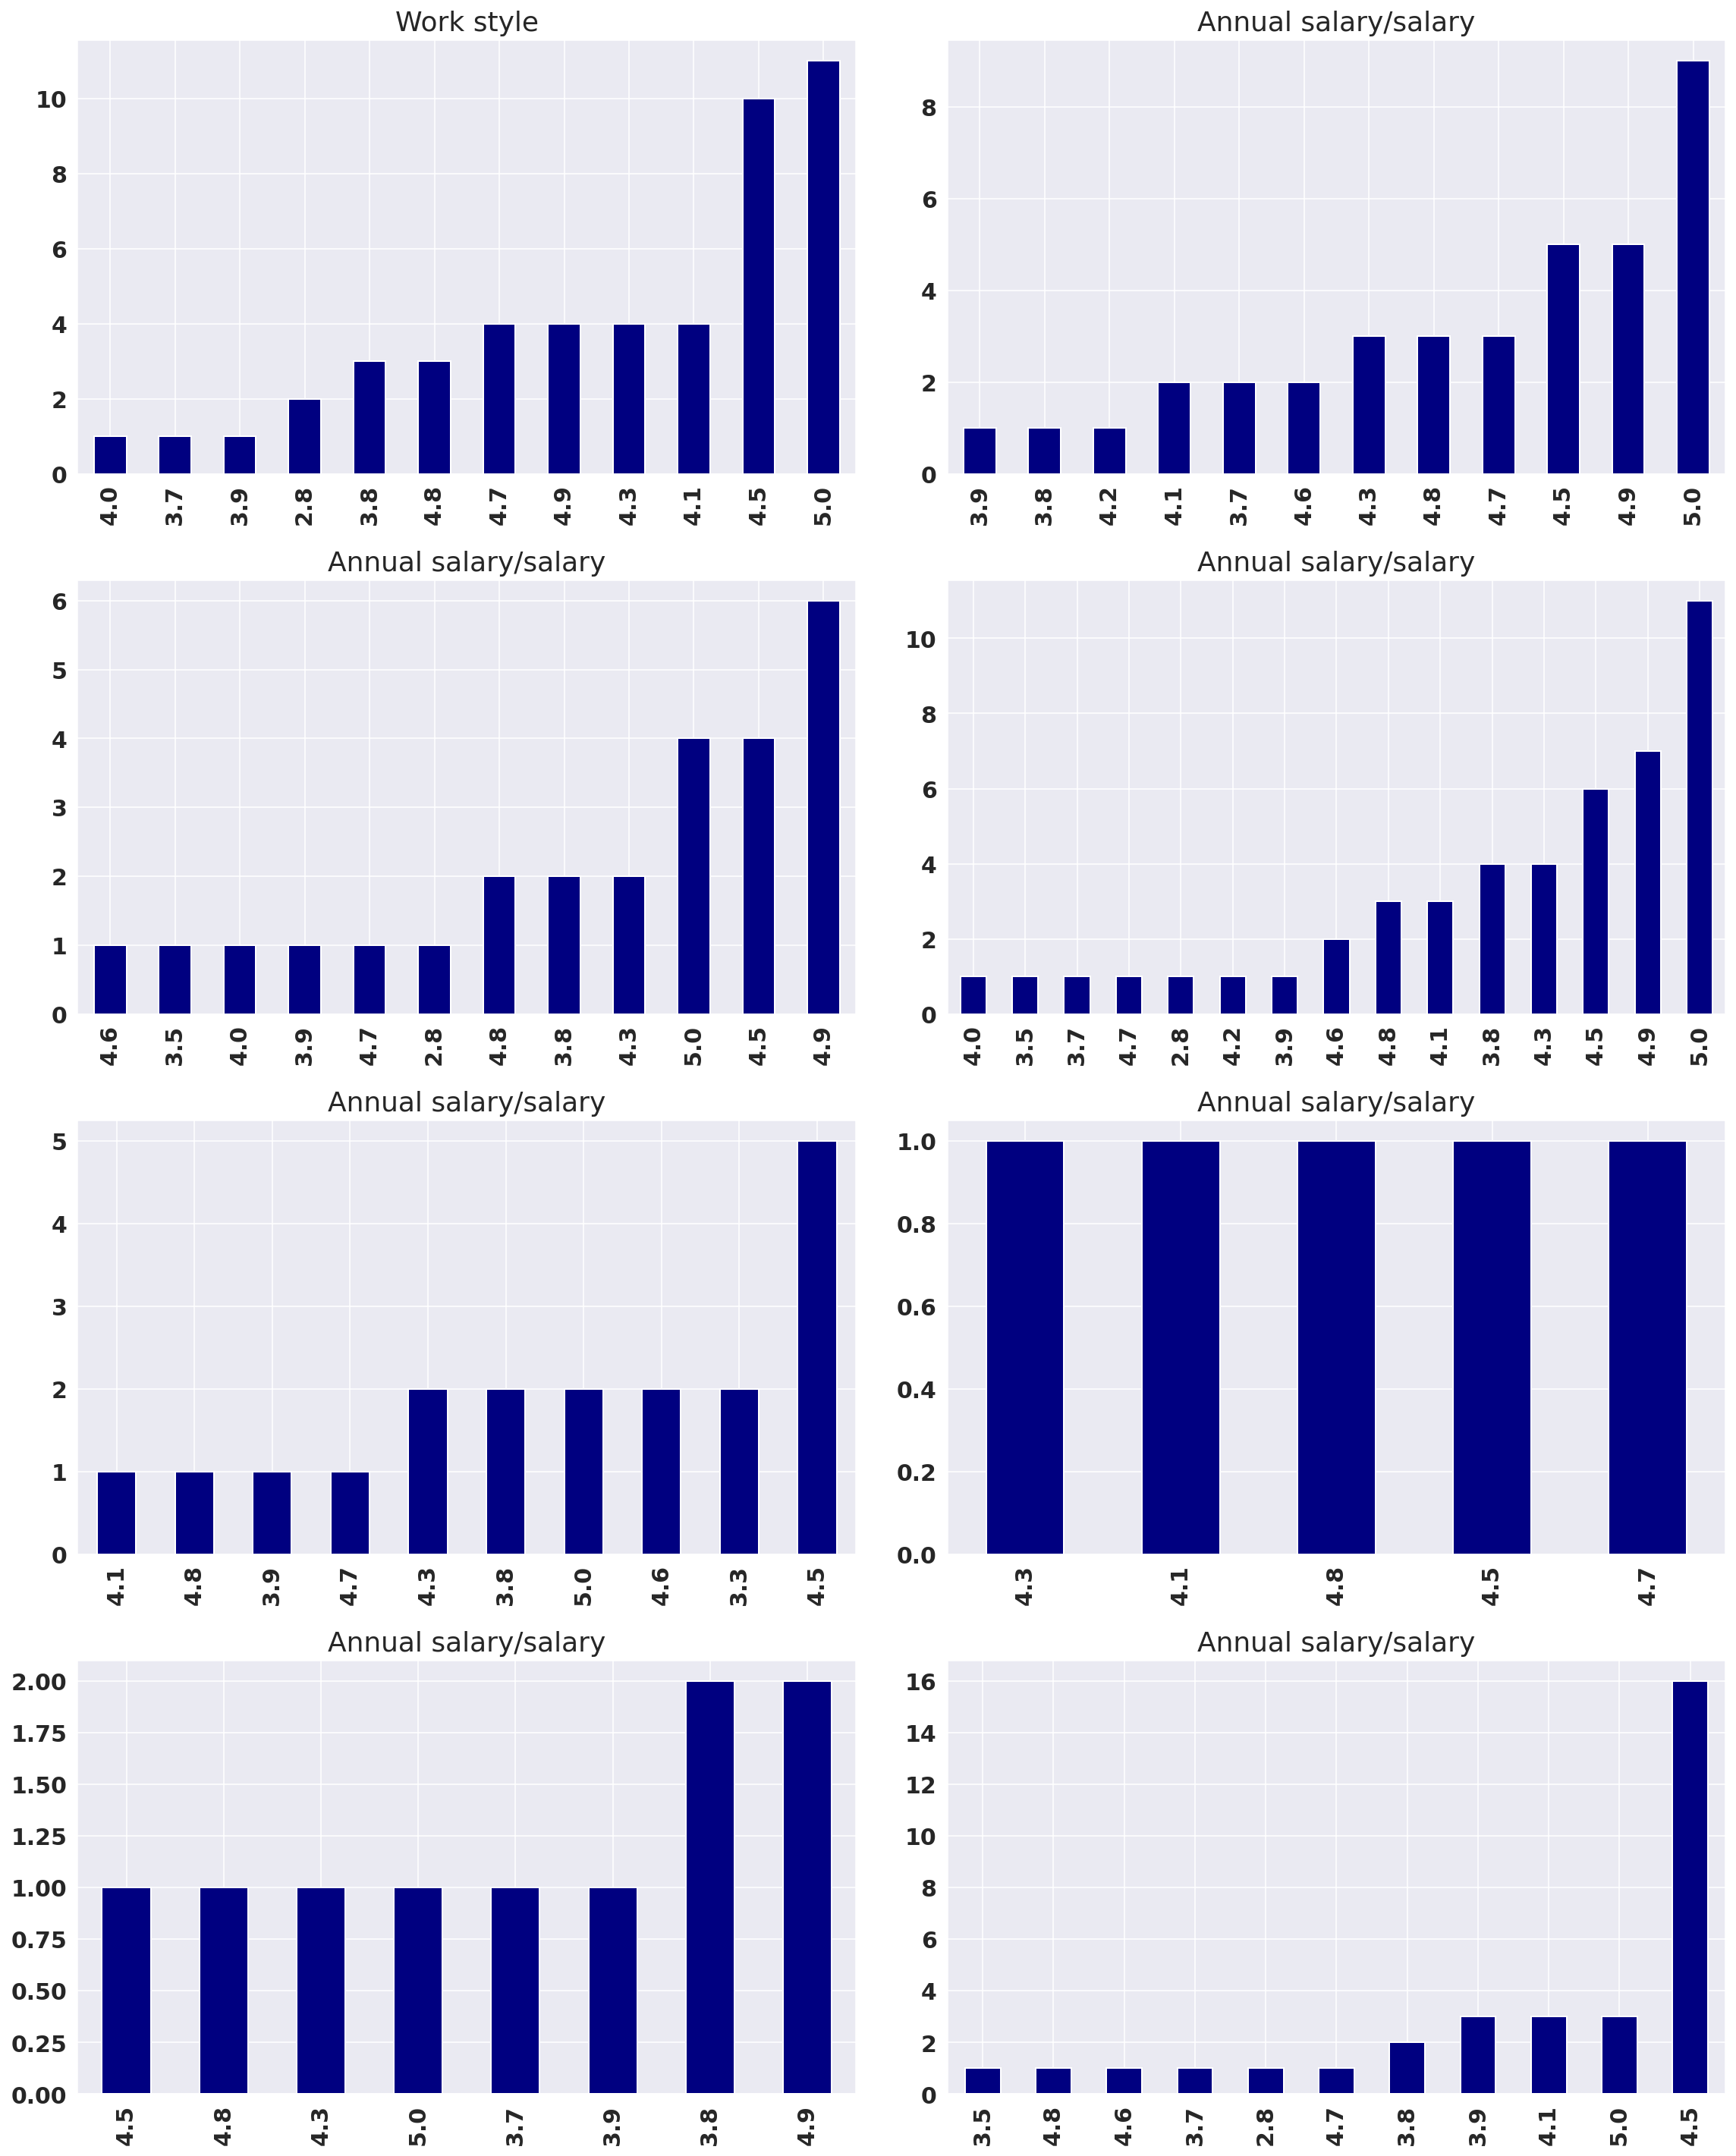

In [69]:
fig, ax = plt.subplots(4,2, figsize=(16,20))

work_balance = df[df['title'] == 'Work style (working hours/holidays/systems)']
work_balance['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[0][0], title='Work style')

salary = df[df['title'] == 'Annual salary/salary']
salary['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[0][1], title='Annual salary/salary')

culture = df[df['title'] == 'Corporate culture/organizational system']
culture['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[1][0], title='Corporate culture/organizational system')

benefit = df[df['title'] == 'Benefits/office environment']
benefit['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[1][1], title='Benefits/office environment')

business = df[df['title'] == 'Business prospects/strengths/weaknesses']
business['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[2][0], title='Annual salary/salary')

gap = df[df['title'] == 'Gap before joining the company']
gap['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[2][1], title='Annual salary/salary')

women = df[df['title'] == 'working for women']
women['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[3][0], title='Annual salary/salary')

motivation = df[df['title'] == 'Growth/motivation']
motivation['rating'].value_counts().sort_values().plot(kind = 'bar', color='navy', ax=ax[3][1], title='Annual salary/salary')

fig.tight_layout()
plt.show()

<AxesSubplot:>

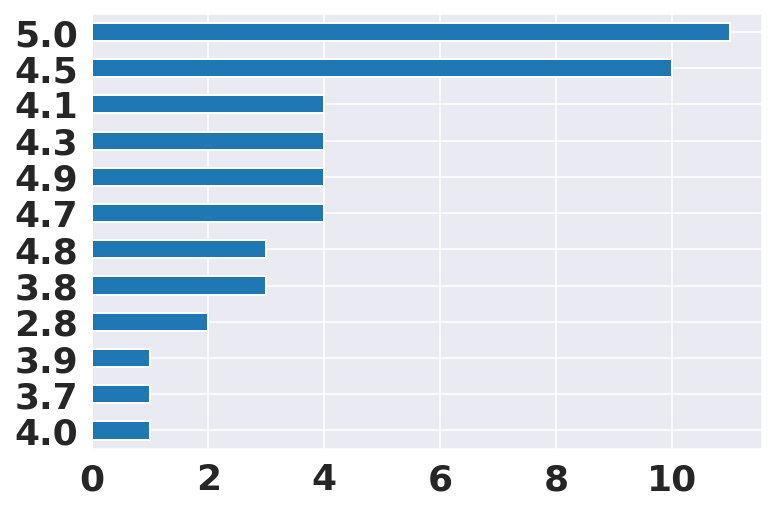

In [14]:
work_balance = df[df['title'] == 'Work style (working hours/holidays/systems)']
work_balance['rating'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

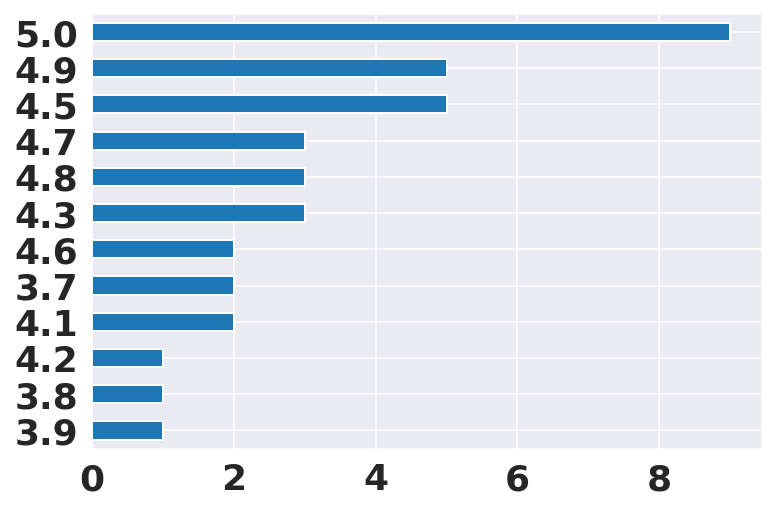

In [15]:
salary = df[df['title'] == 'Annual salary/salary']
salary['rating'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

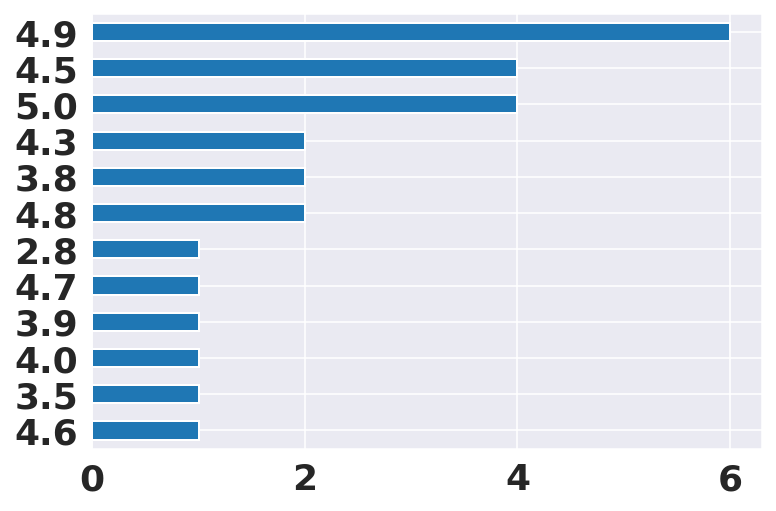

In [16]:
culture = df[df['title'] == 'Corporate culture/organizational system']
culture['rating'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

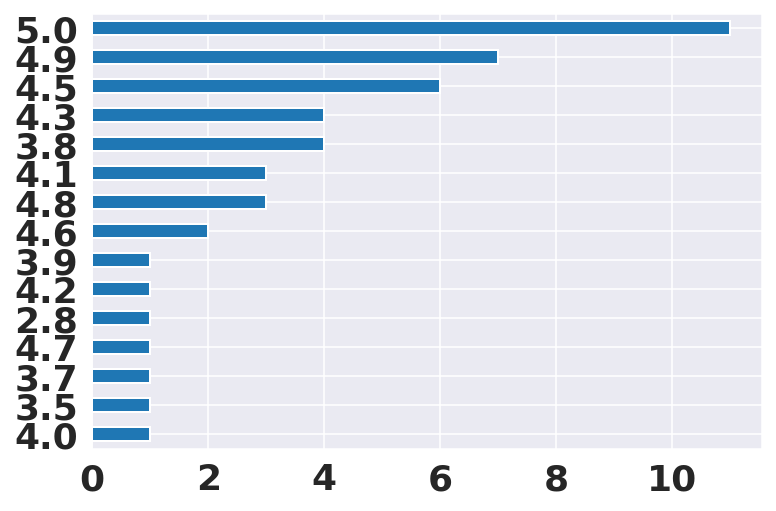

In [17]:
benefit = df[df['title'] == 'Benefits/office environment']
benefit['rating'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

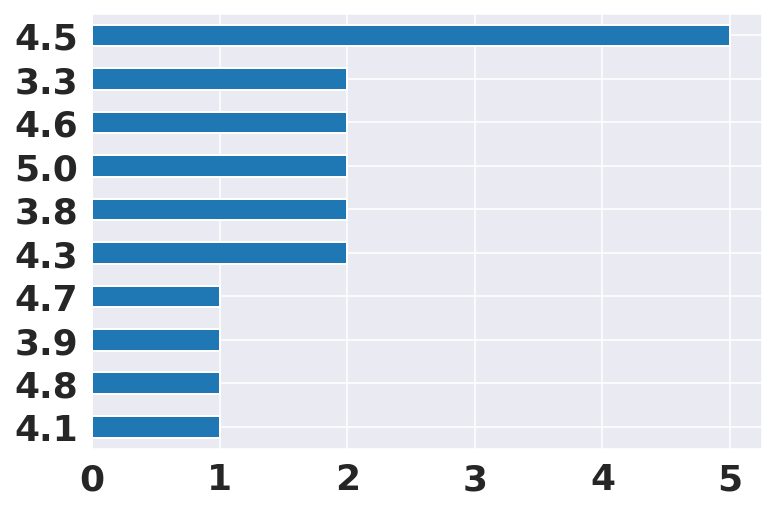

In [18]:
business = df[df['title'] == 'Business prospects/strengths/weaknesses']
business['rating'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

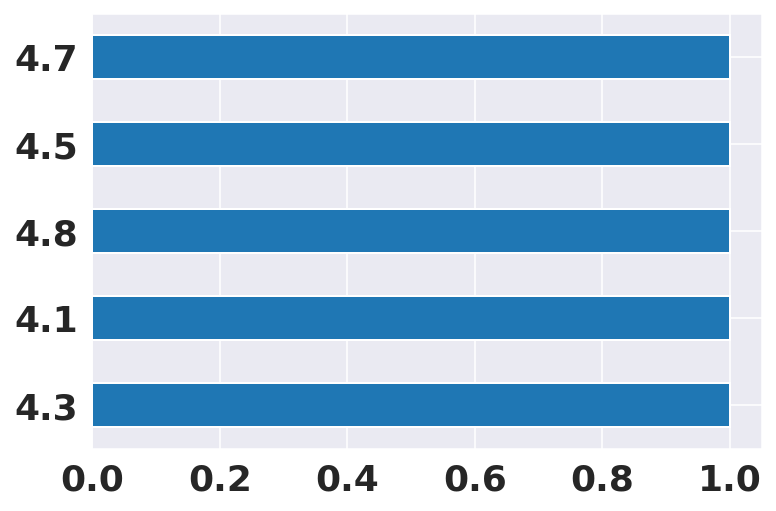

In [19]:
gap = df[df['title'] == 'Gap before joining the company']
gap['rating'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

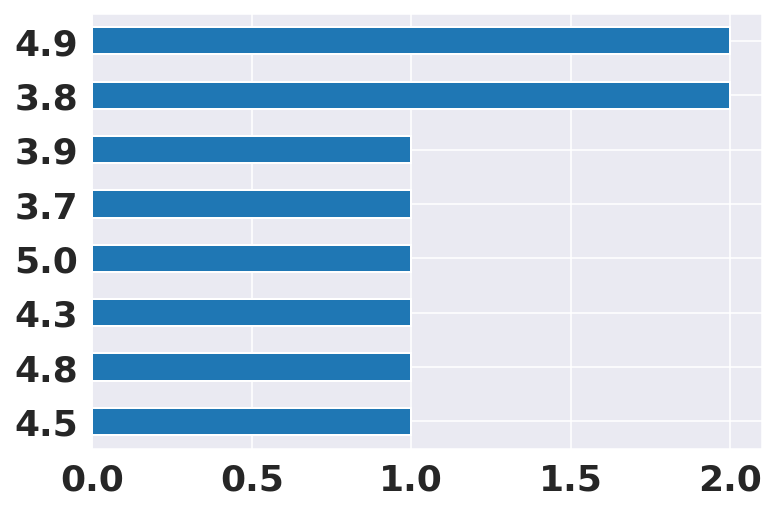

In [20]:
women = df[df['title'] == 'working for women']
women['rating'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

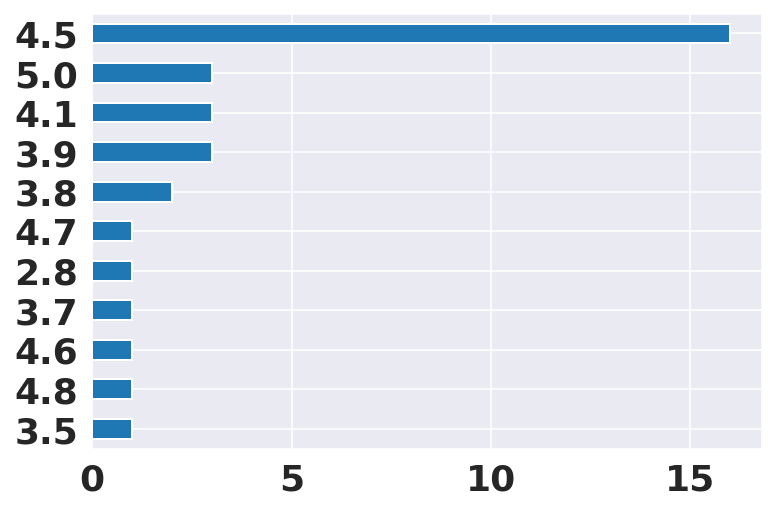

In [21]:
motivation = df[df['title'] == 'Growth/motivation']
motivation['rating'].value_counts().sort_values().plot(kind = 'barh')

In [22]:
df

,reviewer_info,title,rating,review,year
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報
2,男性/ Solution Engineer/ 現職（回答時）/ 中途入社/ 在籍3～5年/ ...,Annual salary/salary,5.0,給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...,2020年時点の情報
3,男性/ 6903/ 現職（回答時）/ 中途入社/ 在籍6～10年/ 正社員,Corporate culture/organizational system,4.9,企業カルチャー・社風:カスタマーサクセスを打ち出しており、導入後も運用をサポートする部門が支...,2021年時点の情報
4,男性/ カスタマーサクセス/ 現職（回答時）/ 中途入社/ 在籍11～15年/ 正社員/ デ...,Benefits/office environment,5.0,福利厚生:オフィス内のカフェテリアは充実している。エスプレッソマシンは自動であるが、豆もそれ...,2020年時点の情報
...,...,...,...,...,...
95,NaN,Benefits/office environment,4.5,福利厚生：【有給休暇の取りやすさ、申請方法】2〜3日前にwebで申請。 社内のコミュニ...,2013年時点の情報
96,NaN,Business prospects/strengths/weaknesses,4.5,雇用の安定性：【休日・休暇の充実度(月間の休日日数)】週休2日制。 休日出勤は自由に出...,2013年時点の情報
97,男性/ サポート/ 現職（回答時）/ 中途入社/ 在籍21年以上/ 正社員,Business prospects/strengths/weaknesses,4.7,事業の強み:サブスクリプションモデルなので、お客様が契約をやめない限り、成長は見込める。,2021年時点の情報
98,男性/ サポート/ 現職（回答時）/ 中途入社/ 在籍21年以上/ 正社員,Gap before joining the company,4.7,入社時の期待と入社後のギャップ:入社時に着たいてていたこと、入社後のギャップは何もない。,2021年時点の情報


In [23]:
df.columns

Index(['reviewer_info', 'title', 'rating', 'review', 'year'], dtype='object')

In [24]:
df.head(2)

,reviewer_info,title,rating,review,year
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報


In [25]:
df.review

0     勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...
1     勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...
2     給与制度:提示される想定年収の8割が固定給で残り2割がインセンティブインセンティブは四半期ご...
3     企業カルチャー・社風:カスタマーサクセスを打ち出しており、導入後も運用をサポートする部門が支...
4     福利厚生:オフィス内のカフェテリアは充実している。エスプレッソマシンは自動であるが、豆もそれ...
                            ...                        
95    福利厚生：【有給休暇の取りやすさ、申請方法】2〜3日前にwebで申請。    社内のコミュニ...
96    雇用の安定性：【休日・休暇の充実度(月間の休日日数)】週休2日制。    休日出勤は自由に出...
97         事業の強み:サブスクリプションモデルなので、お客様が契約をやめない限り、成長は見込める。
98         入社時の期待と入社後のギャップ:入社時に着たいてていたこと、入社後のギャップは何もない。
99    オフィス環境：オフィスの立地も東京駅すぐ前で移動にとても便利。オフィス内部も綺麗で会社のカル...
Name: review, Length: 225, dtype: object

In [26]:
df.head(2)

,reviewer_info,title,rating,review,year
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報


In [27]:
from googletrans import Translator
tr = Translator(service_urls=['translate.googleapis.com'])
tr = Translator()
tr.translate(text="こんにちは", src="ja", dest="en").text

'hello'

In [28]:
df['review_translated'] = df['review'].apply(lambda x : tr.translate(x, src="ja", dest="en").text)

In [29]:
df['reviwe_translated_original'] = df['review_translated']

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

## Tokenizer

In [31]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

## Remove special Chars

In [32]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['review_translated']=df['review_translated'].apply(remove_special_characters)

## Text Stemming

In [33]:
# #Stemming the text
# def simple_stemmer(text):
#     ps=nltk.porter.PorterStemmer()
#     text= ' '.join([ps.stem(word) for word in text.split()])
#     return text
# #Apply function on review column
# df['Pros']=df['Pros'].apply(simple_stemmer)

## Lemmatization

In [34]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df['review_translated']=df['review_translated'].apply(lemmatize_text)

In [35]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['review_translated']=df['review_translated'].apply(remove_stopwords)

{'ll', 'had', 'their', 'itself', 'up', 'further', 'ourselves', 'shouldn', 'yourselves', 'been', 'ain', 'above', 'having', 'from', 'ma', 'i', 'than', 'weren', 'him', 'being', 'it', 'these', 'if', 'y', "weren't", 'nor', 'own', 'while', 'for', 'me', 'them', 'here', "couldn't", 'of', 'am', "you've", 'between', 'no', 'our', 'your', 'theirs', 'into', 'haven', 'hers', "won't", 'be', 'each', 'm', "mustn't", 'hadn', 'wasn', "didn't", 'what', 'doesn', 'other', 'just', 'he', 'its', "don't", 'yourself', 'why', 'until', 'is', 'such', "wouldn't", 'through', 've', 'couldn', 'has', 'those', 'themselves', 'his', 'wouldn', 'will', "haven't", 'who', 'or', 'that', "you'd", 'this', "isn't", "hadn't", 'before', 'both', 'off', 'don', "that'll", 'd', 'won', 't', "shouldn't", 'mightn', 'o', 'mustn', 'we', "you're", 're', 'most', "doesn't", 'at', 'some', 'doing', 'ours', "it's", 'shan', 'and', 'again', "she's", 'they', 'few', 'himself', 'so', "aren't", 'didn', "hasn't", 'against', 'herself', 'should', 'whom', '

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


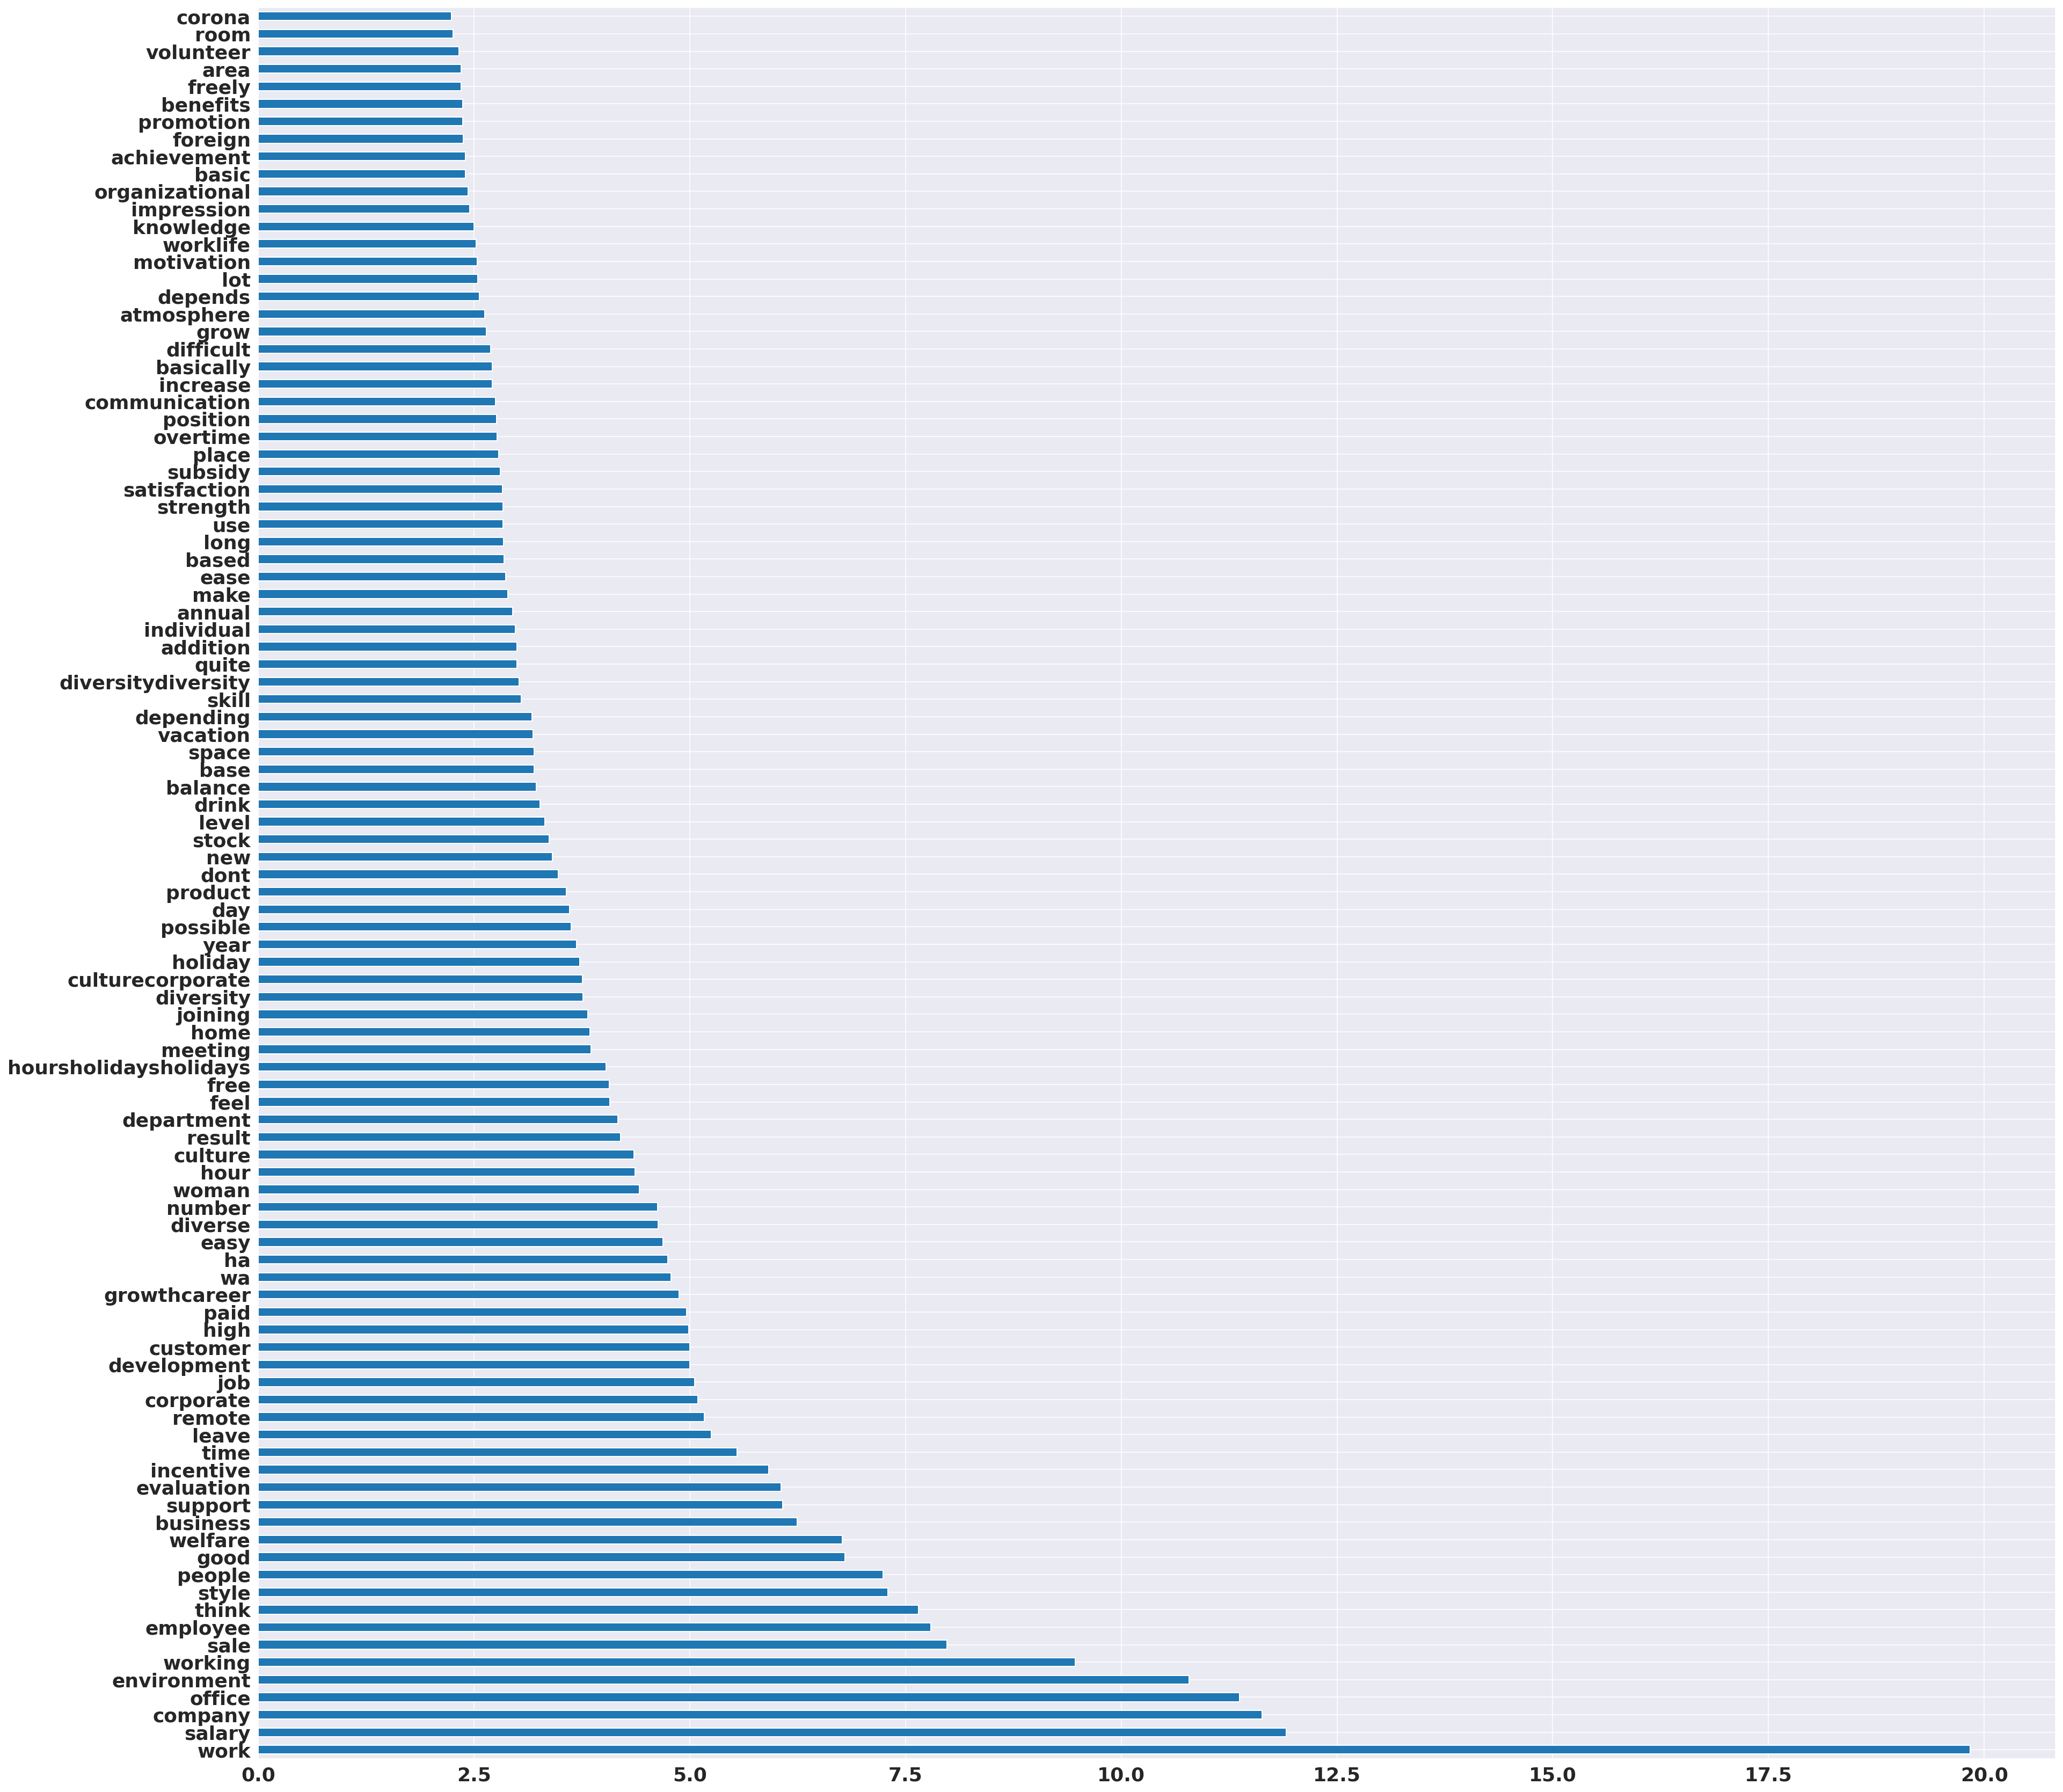

In [36]:
tf = TfidfVectorizer(stop_words='english', min_df=3)
tf.fit(df['review_translated'])

pro_tf = tf.transform(df['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

In [37]:
df[df['review_translated'].str.contains('remote')]

,reviewer_info,title,rating,review,year,review_translated,reviwe_translated_original
0,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスをとるかどうかは自分次第。ベースとなる勤務時間は9：...,2022年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...
1,男性/ 営業/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.7,勤務時間・休日休暇:ワークライフバランスを保てるかどうかは自分次第。強制的に残業や休日の仕事...,2021年時点の情報,"[ ' Working ' , ' HoursHolidaysHolidays ' , ' ...",Working Hours/Holidays/Holidays: It's up to yo...
5,女性/ アカウントエグゼクティブ/ 退職済み（2022年）/ 中途入社/ 在籍3～5年/ 正社員,Work style (working hours/holidays/systems),2.8,勤務時間・休日休暇:ワークライフバランスは、アカウントエグゼクティブをしている限りはない。達...,2022年時点の情報,"[ ' Working ' , ' HoursHoliday ' , ' Leave ' ,...",Working Hours/Holiday Leave: Work-life balance...
10,男性/ account executive/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.5,勤務時間・休日休暇:提案など立て込むと非常に忙しくなる。ワークライフバランスをとるために意識...,2021年時点の情報,"[ ' Working ' , ' hoursholidaysholidaysholiday...",Working hours/holidays/holidays/holidays/holid...
17,女性/ インサイドセールス/ 現職（回答時）/ 中途入社/ 在籍21年以上/ 正社員,Corporate culture/organizational system,3.5,企業カルチャー・社風:社会貢献とビジネスの両立を目指しており、日頃から社員にボランティアの機...,2022年時点の情報,"[ ' Corporate ' , ' CultureCorporate ' , ' Sty...",Corporate Culture/Corporate Style: Aiming to b...
20,男性/ アカウントエグゼクティブ/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員/ EBU,Work style (working hours/holidays/systems),4.3,勤務時間・休日休暇:裁量型のためやることさえやっていれば、就労時間の組み立ては自由度が高い。...,2020年時点の情報,"[ ' Working ' , ' hoursholidays ' , ' ' , ' ho...",Working hours/holidays and holidays: Since it ...
22,男性/ account executive/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Corporate culture/organizational system,4.5,企業カルチャー・社風:みんなで戦う、みんなで成功を祝うような雰囲気がある。組織体制・コミュニ...,2021年時点の情報,"[ ' Corporate ' , ' culturecorporate ' , ' sty...",Corporate culture/corporate style: There is an...
23,男性/ インサイドセールス/ 現職（回答時）/ 中途入社/ 在籍3～5年/ 正社員/ sal...,Benefits/office environment,4.3,福利厚生:リモートワークにかかる機器の費用補助など非常に恵まれていると思う。オフィス勤務して...,2021年時点の情報,"[ ' Welfare ' , ' ' , ' think ' , ' ' , ' ' , ...","Welfare: I think that I am very blessed, such ..."
24,男性/ 営業/ 現職（回答時）/ 新卒入社/ 在籍21年以上/ 正社員,Work style (working hours/holidays/systems),5.0,多様な働き方支援:リモートワークできる環境が整備されていて基本的にほぼ在宅勤務です。貸与され...,2021年時点の情報,"[ ' Diverse ' , ' work ' , ' style ' , ' suppo...",Diverse work style support: An environment whe...
7,男性/ サクセスマネージャー/ 現職（回答時）/ 中途入社/ 在籍3年未満/ 正社員,Work style (working hours/holidays/systems),4.0,勤務時間・休日休暇:勤務時間は職種にもよるが、比較的自由であった。というよりもやるべき事が多...,2022年時点の情報,"[ ' Working ' , ' hoursholidays ' , ' ' , ' ho...",Working hours/holidays and holidays: Although ...


/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Figure(2160x2160)


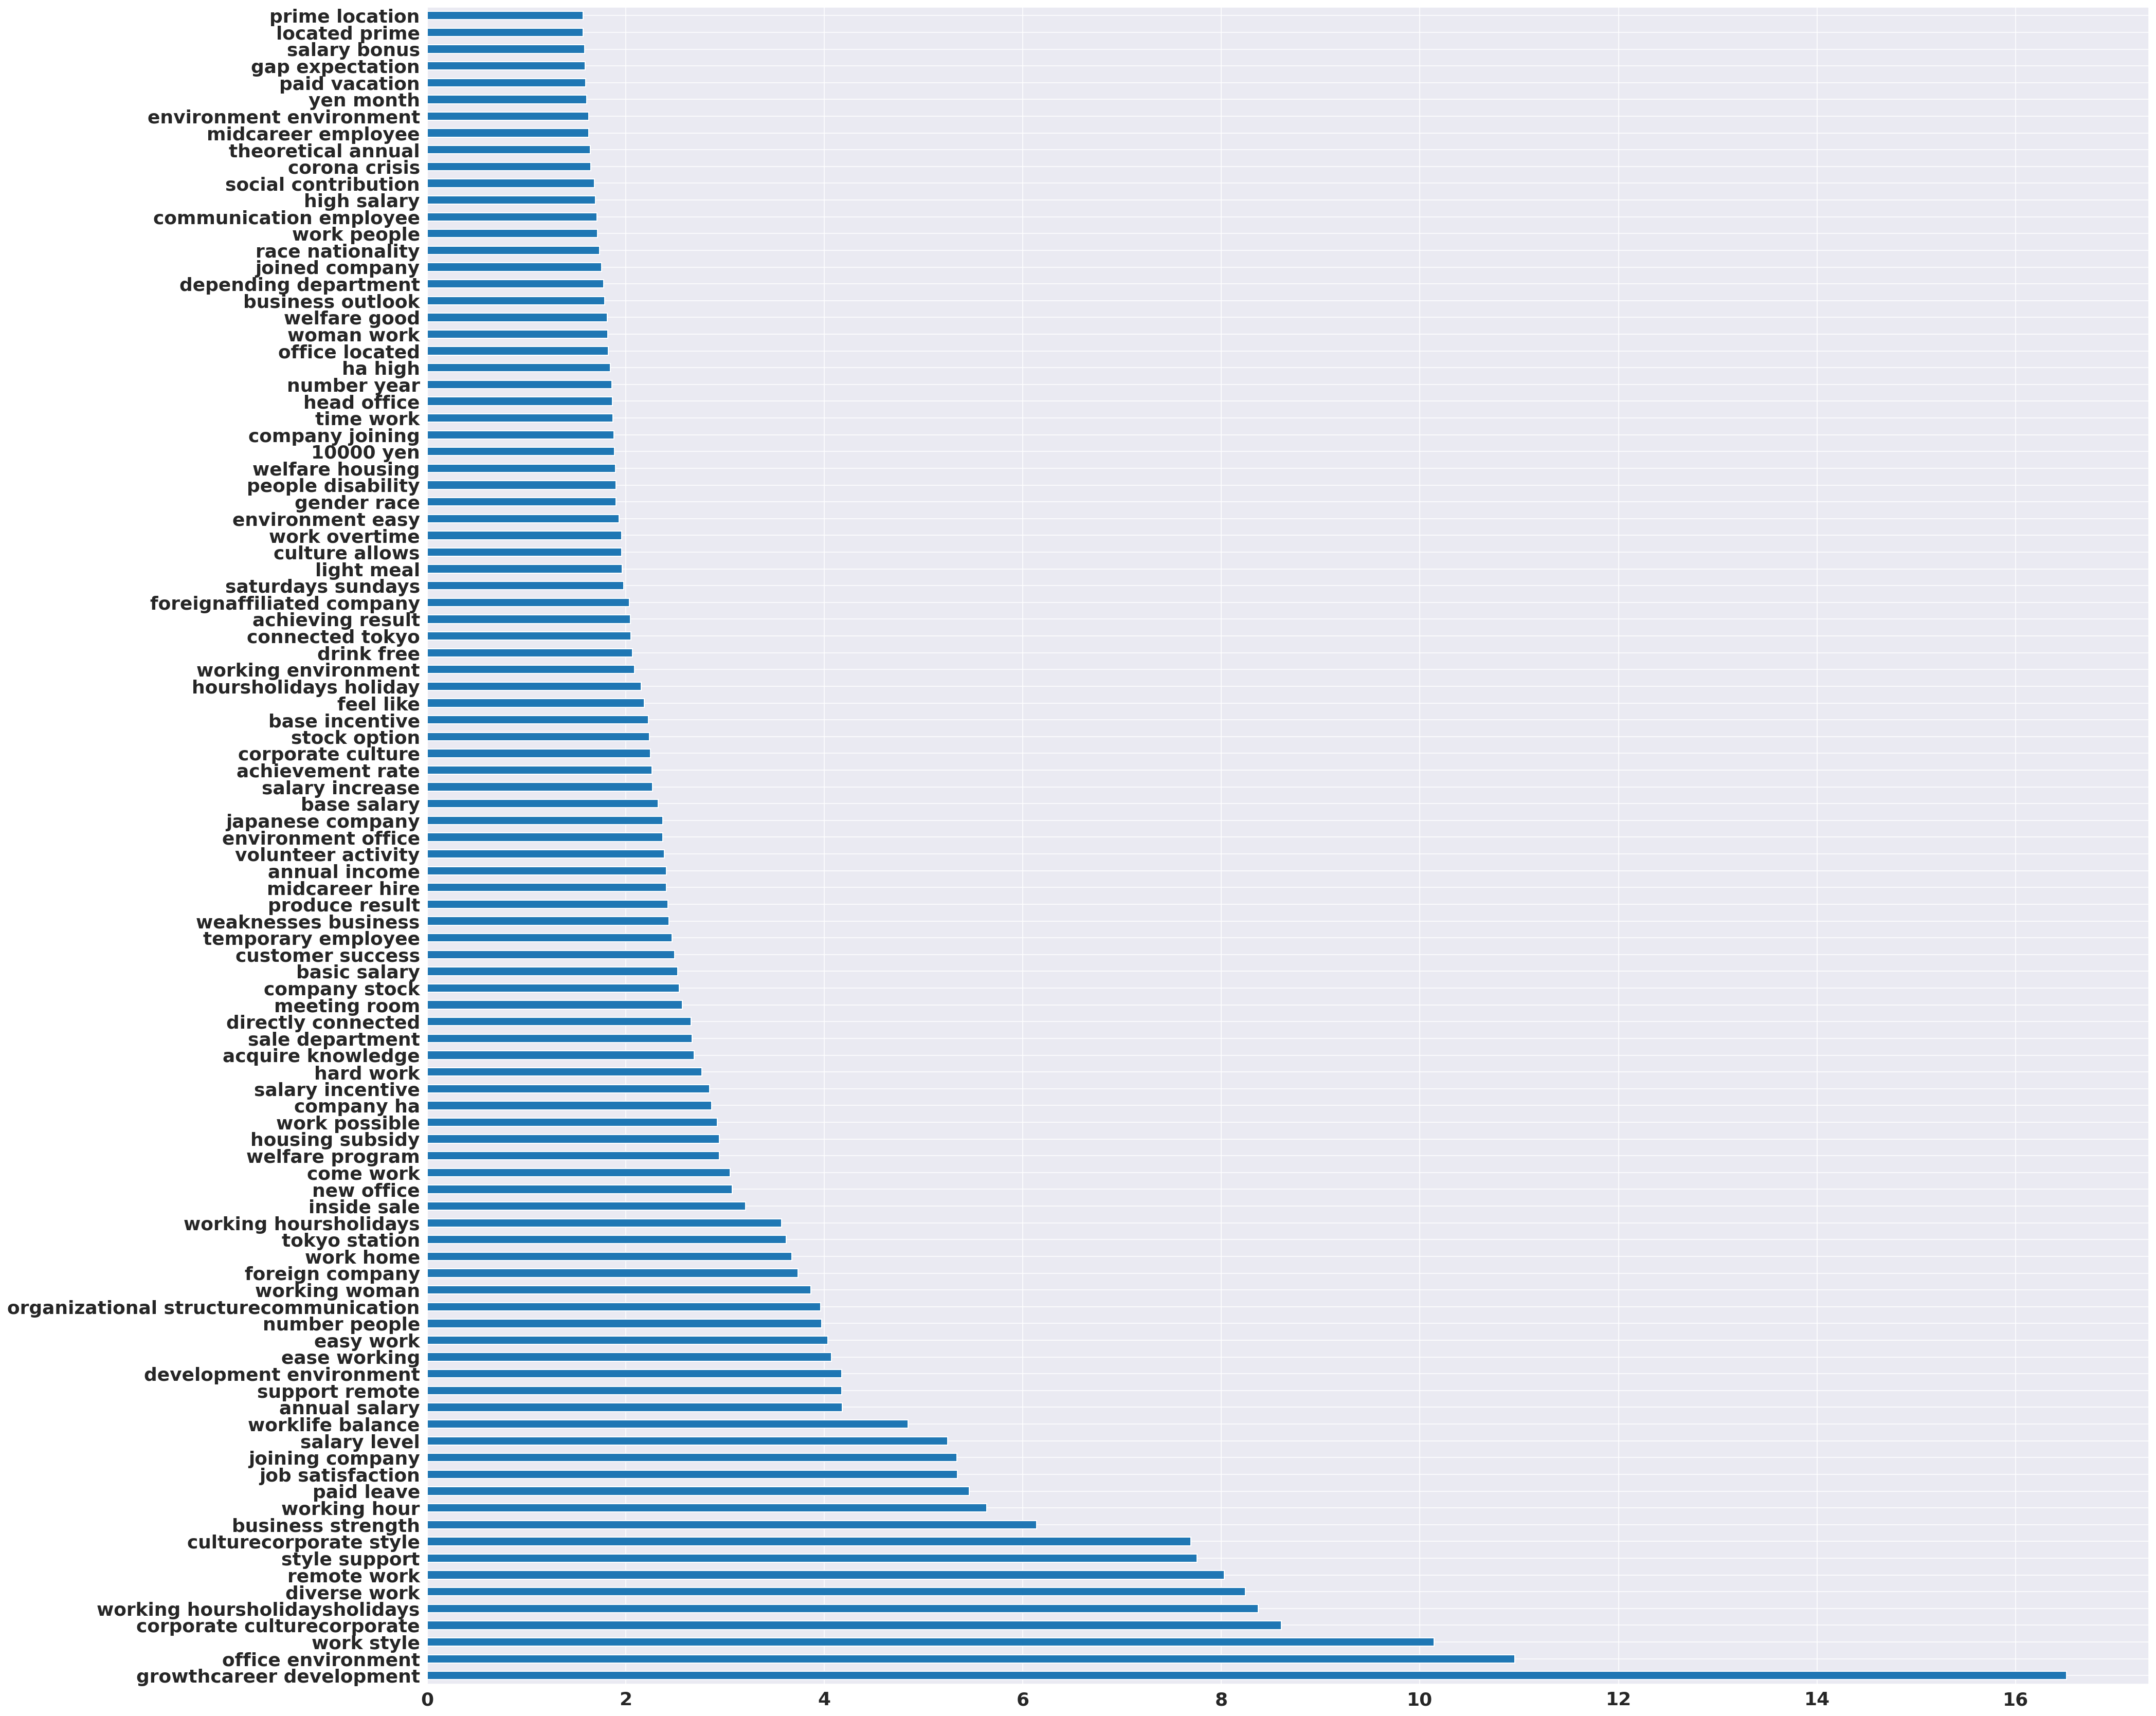

In [38]:
tf = TfidfVectorizer(stop_words='english', min_df=3, ngram_range= (2,2))
tf.fit(df['review_translated'])

pro_tf = tf.transform(df['review_translated'])
pro_df = pd.DataFrame(pro_tf.todense(), columns=tf.get_feature_names())



fig, ax = plt.subplots(figsize = (30,30))
top_texts = pro_df.sum().sort_values(ascending=False)
top_texts.head(100).plot(kind='barh')
print(fig)

In [39]:
df.to_csv('jp_nlp_cleaned.csv')

# Japanese NLP

In [40]:
li = df.review.tolist()

In [41]:
import sentencepiece as spm
from sentencepiece import SentencePieceTrainer
from sentencepiece import SentencePieceProcessor

In [42]:
with open('text.txt', 'w') as f:
    f.write(str(li))

In [43]:
import nltk
from nltk.corpus.reader import *
from nltk.corpus.reader.util import *
from nltk.text import Text

In [44]:
jp_sent_tokenizer = nltk.RegexpTokenizer(u'[^　「」！？。]*[！？。]')

In [45]:
jp_chartype_tokenizer = nltk.RegexpTokenizer(u'([ぁ-んー]+|[ァ-ンー]+|[\u4e00-\u9FFF]+|[^ぁ-んァ-ンー\u4e00-\u9FFF]+)')

In [46]:
nlp = PlaintextCorpusReader( '/Users/hitomihoshino/Documents/DS/salesforce', r'text.txt',
                               encoding='utf-8',
                               para_block_reader=read_line_block,
                               sent_tokenizer=jp_sent_tokenizer,
                               word_tokenizer=jp_chartype_tokenizer)

In [47]:
# nlp.raw()

type(nlp_t)

NameError: name 'nlp_t' is not defined

In [ ]:
nlp_t = Text(w.encode('utf-8') for w in nlp.words() )
# nlp_t.concordance("マネージャー") 